# **`Gold Price Prediction`**

In [3]:
# essential libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### **`1. Data Collection and pre-processing`**

In [6]:
gold_df = pd.read_csv("data/gld_price_data.csv")
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
print("Shape: ",gold_df.shape)

Shape:  (2290, 6)


In [9]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [23]:
gold_df = gold_df.drop("Date",axis=1)
correlation = gold_df.corr()


<Axes: >

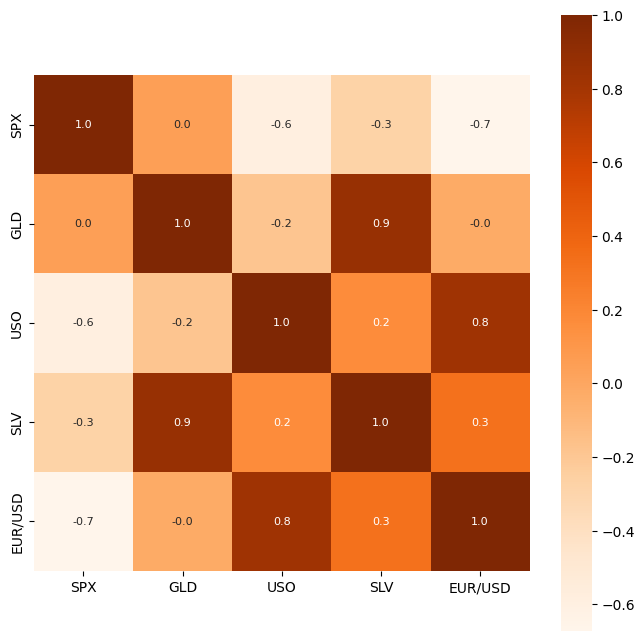

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Oranges")

### **`Correlation values of GLD`**

In [30]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/q1/9fvj93fn71d3fvxrrp2qqkf80000gn/T/ipykernel_3703/3827324978.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df["GLD"],color="Green")


<Axes: xlabel='GLD', ylabel='Density'>

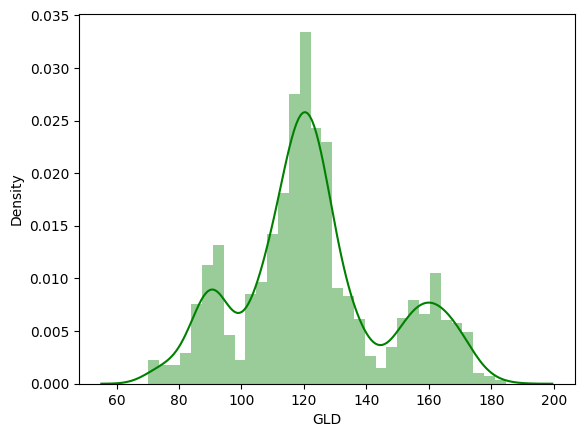

In [38]:
sns.distplot(gold_df["GLD"],color="Green")

### **`Train Test Split`**

In [43]:
x = gold_df.drop("GLD",axis=1)
y = gold_df["GLD"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [44]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
score = model.score(x_test,y_test)
score

0.9892342075838543

In [46]:
model.predict(x_test)

array([168.45429919,  82.14539997, 116.05989999, 127.72820116,
       120.95620135, 154.67839747, 150.37479839, 126.16880045,
       117.5275987 , 126.02570048, 116.80580068, 172.14220058,
       141.40479728, 167.78989819, 114.9909004 , 117.5279004 ,
       138.43290293, 169.97420082, 159.17960389, 155.21129916,
       155.05659992, 125.02219987, 176.11820018, 156.60460405,
       125.25710025,  93.53999986,  77.72800032, 120.85649978,
       119.14869957, 167.46329959,  88.27120065, 125.2183003 ,
        91.13820089, 117.71380031, 121.21509913, 136.4923014 ,
       115.51160086, 115.13700083, 147.9053995 , 107.34380098,
       104.09730245,  87.21389799, 126.31260086, 117.80700022,
       153.72169858, 119.41740015, 108.40099998, 108.0923983 ,
        93.21900045, 127.20299769,  74.89380015, 113.59089929,
       121.33130045, 111.31909928, 119.01499902, 120.75219908,
       158.98480066, 167.67720143, 147.07199661,  85.9553989 ,
        94.27310009,  86.68329876,  90.46000008, 119.06